# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

In [2]:
data = pd.read_csv("datas/sample.csv", index_col=[0], sep=";")

In [3]:
data.shape

(95365, 58)

***
# 3 Overview

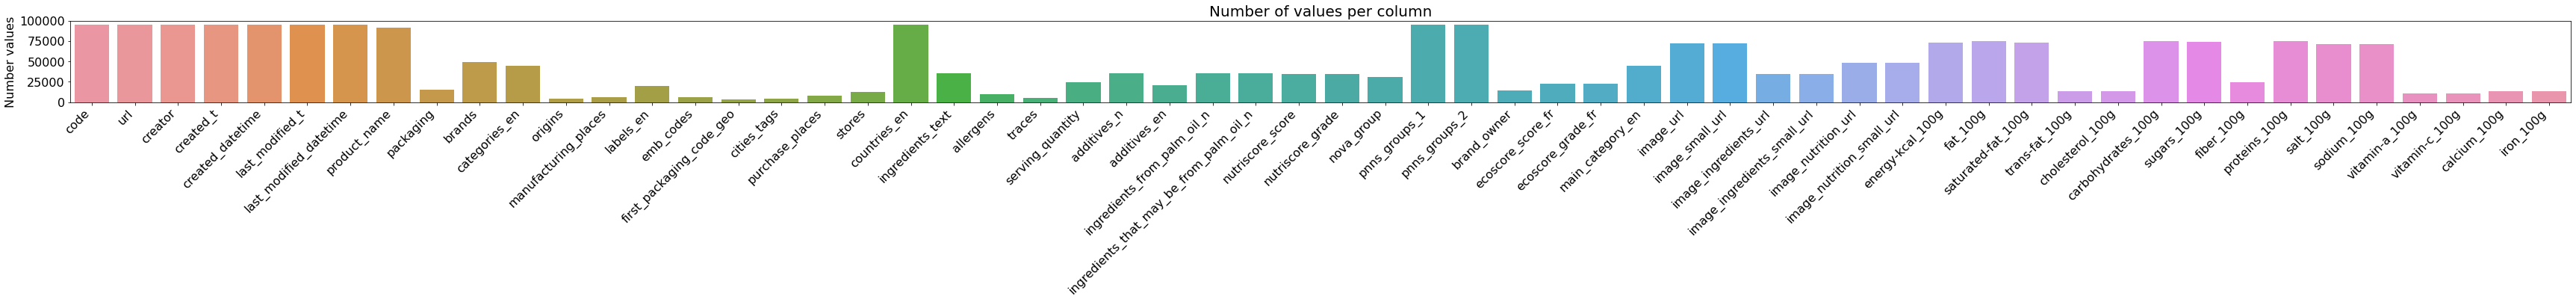

In [4]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# 4 Global correlations

In [5]:
corr = data.corr()

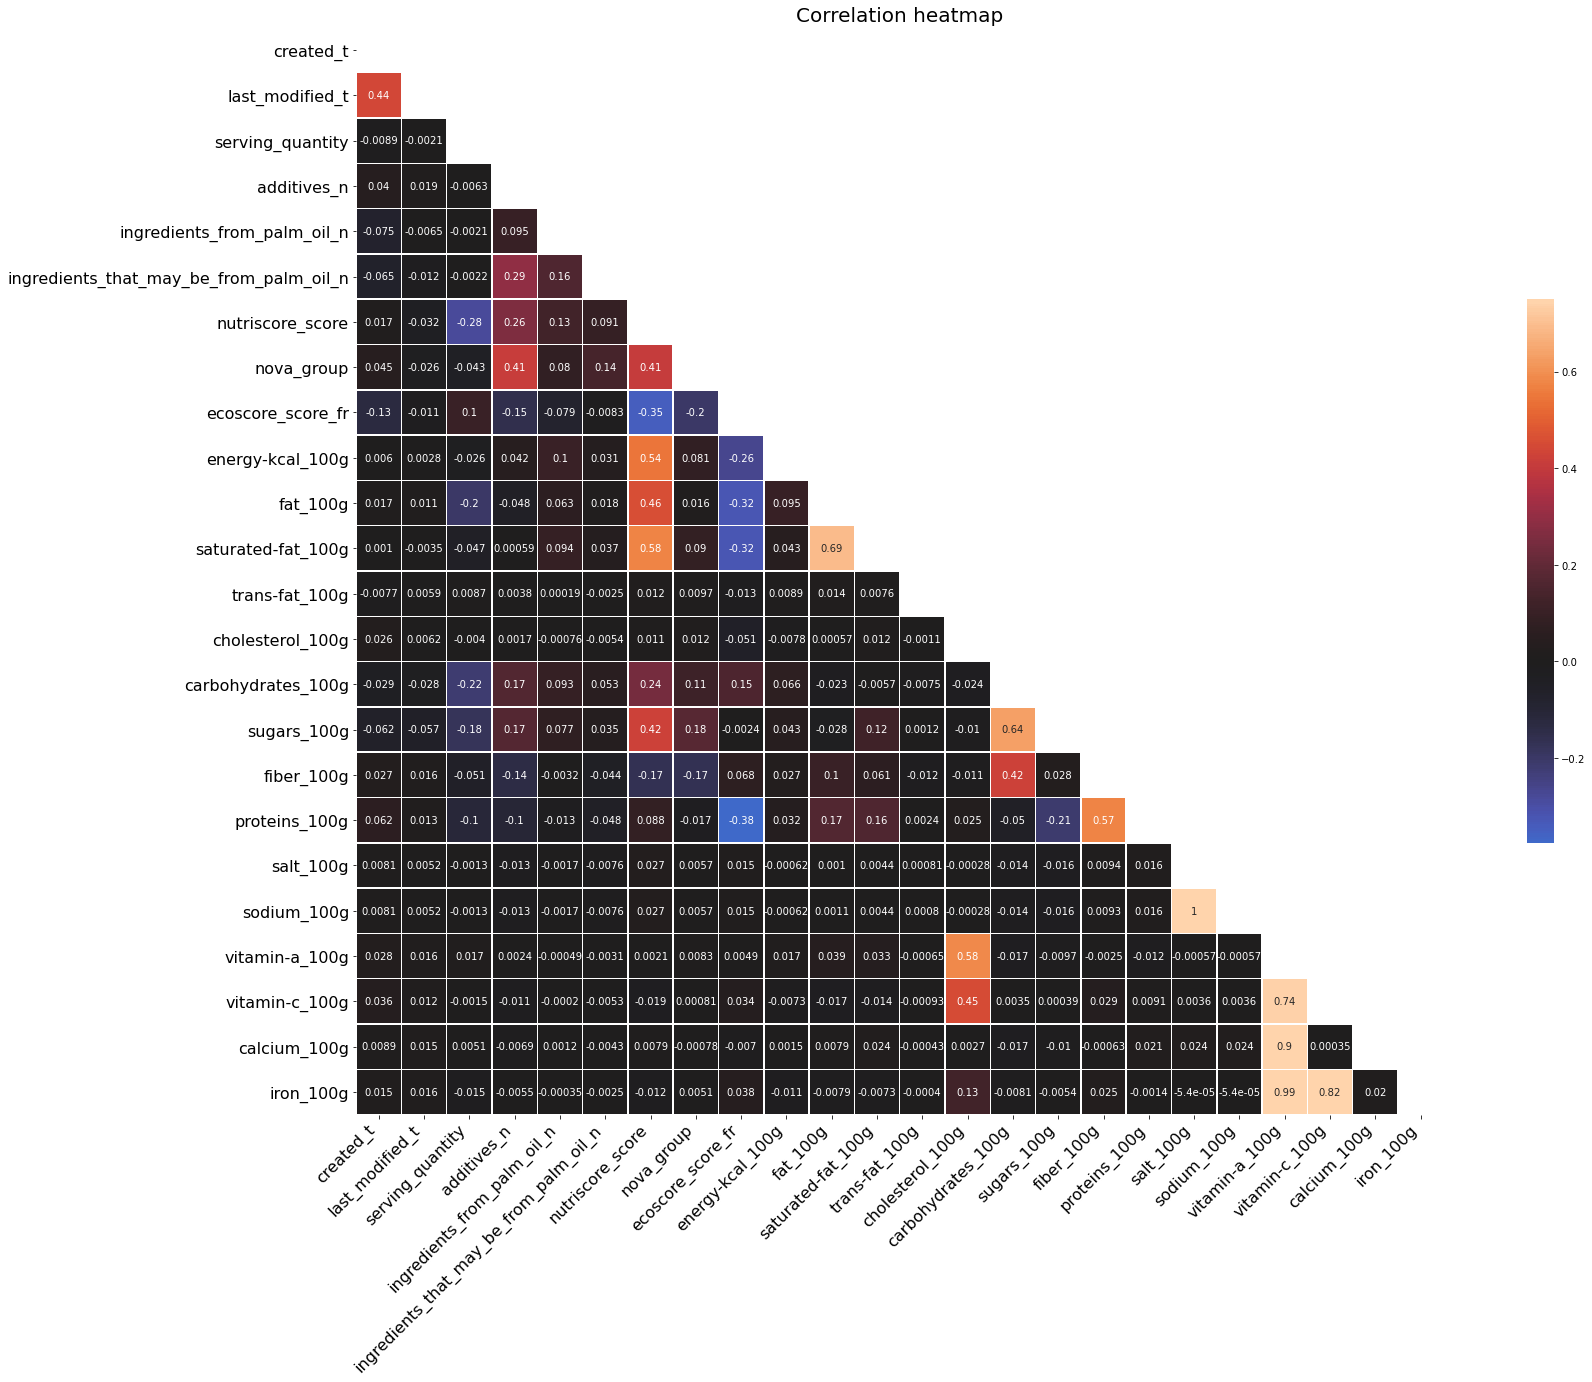

In [6]:
plt.figure(figsize=(30, 20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

***
# 5 Nutriscore / Ecoscore correlations

<AxesSubplot:title={'center':'Nutriscore correlations'}, ylabel='nutriscore_score'>

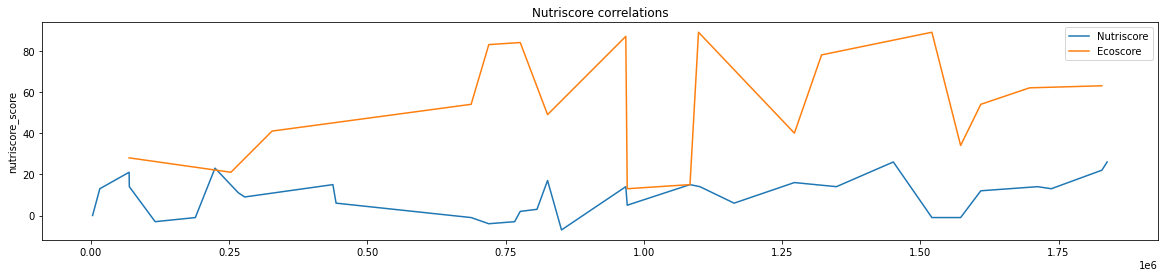

In [7]:
plt.figure(figsize=(20, 4))

plt.title("Nutriscore correlations")

sns.lineplot(y=data.nutriscore_score[::1000], x=data.index[::1000], label="Nutriscore")
sns.lineplot(y=data.ecoscore_score_fr[::1000], x=data.index[::1000], label="Ecoscore")

Nutriscore: the bigger the value, the worst the product is.  
Ecoscore: the bigger the value, the worst the environemental impact is.

## Conclusion:
The worst is a product (high nutriscore), the better it is for the environement (low ecoscore).

***
# 6 Nutriscore / Ecoscore distribution

<Figure size 720x432 with 0 Axes>

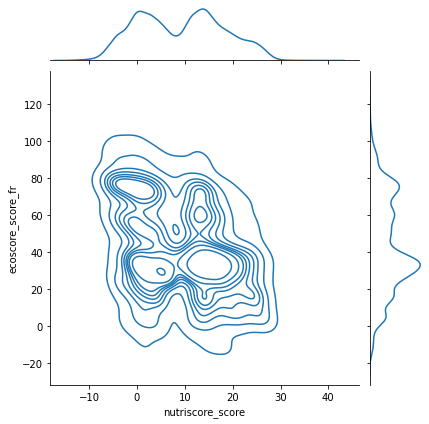

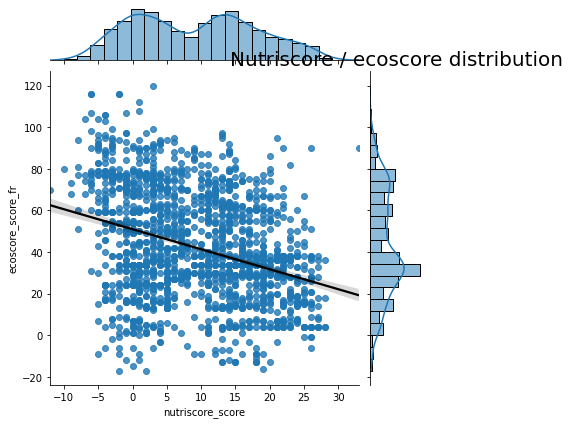

In [8]:
fig = plt.figure(figsize=(10, 6))

sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::1], kind="kde")
sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::10], kind="reg", color=None, joint_kws={"line_kws": {'color':'black'}})

plt.title("Nutriscore / ecoscore distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore", size=16)
plt.ylabel("Ecoscore", size=16)
plt.show()

***
# 7 Nutriscore / countries disribution

In [9]:
data.iloc[10:].countries_en.head(20)

22091            United States
56999            United States
40010            United States
63776            United States
8855             United States
53806            United States
17375            United States
20480            United States
59336            United States
94513            United States
13420            United States
79741            United States
49820            United States
47266    France,United Kingdom
64614            United States
81204            United States
20318            United States
98299            United States
18953     France,United States
81102            United States
Name: countries_en, dtype: object

The feature "countries_en" is in reality a list, as we can see at index 47266: France,United Kingdom.  
We will choose to keep only the last country in this list for each row.

In [10]:
def keep_last_country(row):
    cotr = row["countries_en"]
    splt = cotr.split(",")
    row["countries_en"] = splt[-1]
    return row

data = data[data.countries_en.notna()].apply(lambda row: keep_last_country(row), axis=1)

In [11]:
data.iloc[10:].countries_en.head(20)

22091     United States
56999     United States
40010     United States
63776     United States
8855      United States
53806     United States
17375     United States
20480     United States
59336     United States
94513     United States
13420     United States
79741     United States
49820     United States
47266    United Kingdom
64614     United States
81204     United States
20318     United States
98299     United States
18953     United States
81102     United States
Name: countries_en, dtype: object

Let's see now how the nutriscore is distributed by country.

In [12]:
data_by_countries_nutriscore = data.groupby(["countries_en", "nutriscore_grade"]).nutriscore_grade.agg([len])
data_by_countries_nutriscore

len
countries_en                     nutriscore_grade      
Algeria                          a                    2
                                 b                    3
                                 c                    2
                                 d                    1
                                 e                    4
Allemagne                        e                    2
Andorra                          b                    1
                                 d                    1
Argentina                        a                    3
                                 b                    9
                                 c                    1
                                 d                    6
                                 e                    6
Australia                        a                   25
                                 b                   15
                                 c                   18
                                 d                   14
                                 e                   19
Austria                          a                   12
                                 b                   10
                                 c                   13
                                 d                   23
                                 e                   10
Belgien                          d                    1
Belgique                         d                    2
Belgium                          a                   70
                                 b                   73
                                 c                  119
                                 d                  145
                                 e                   81
Bolivia                          d                    2
Brazil                           a                    3
                                 b                    2
                                 c                    1
                                 e                    2
Bulgaria                         d                    3
                                 e                    1
Cambodia                         b                    1
Cameroon                         a                    1
Canada                           a                   27
                                 b                   34
                                 c                   45
                                 d                   43
                                 e                   18
Chile                            a                    1
                                 b                    2
                                 c                    1
                                 e                    1
China                            c                    1
Colombia                         a                    8
                                 b                   10
                                 c                   10
                                 d                    8
                                 e                    2
Costa Rica                       b                    1
                                 d                    1
Croatia                          a                    2
                                 d                    1
                                 e                    1
Cuba                             a                    1
Cyprus                           c                    2
Czech Republic                   a                    4
                                 b                    4
                                 c                    3
                                 d                   10
                                 e                    7
Côte d'Ivoire                    a                    1
Democratic Republic of the Congo e                    1
Denmark                          a                    3
                                 b                    2
                    

In [13]:
data_by_countries_nutriscore = data_by_countries_nutriscore.reset_index()
data_by_countries_nutriscore.head()

,countries_en,nutriscore_grade,len
0,Algeria,a,2
1,Algeria,b,3
2,Algeria,c,2
3,Algeria,d,1
4,Algeria,e,4


In [ ]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_nutriscore["nutriscore_grade"], y=data_by_countries_nutriscore["len"])

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

In [14]:
nutriscore_distrib_per_country = data_by_countries_nutriscore.loc[data_by_countries_nutriscore.countries_en.isin(["France", "Germany", "Belgium", "Canad", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

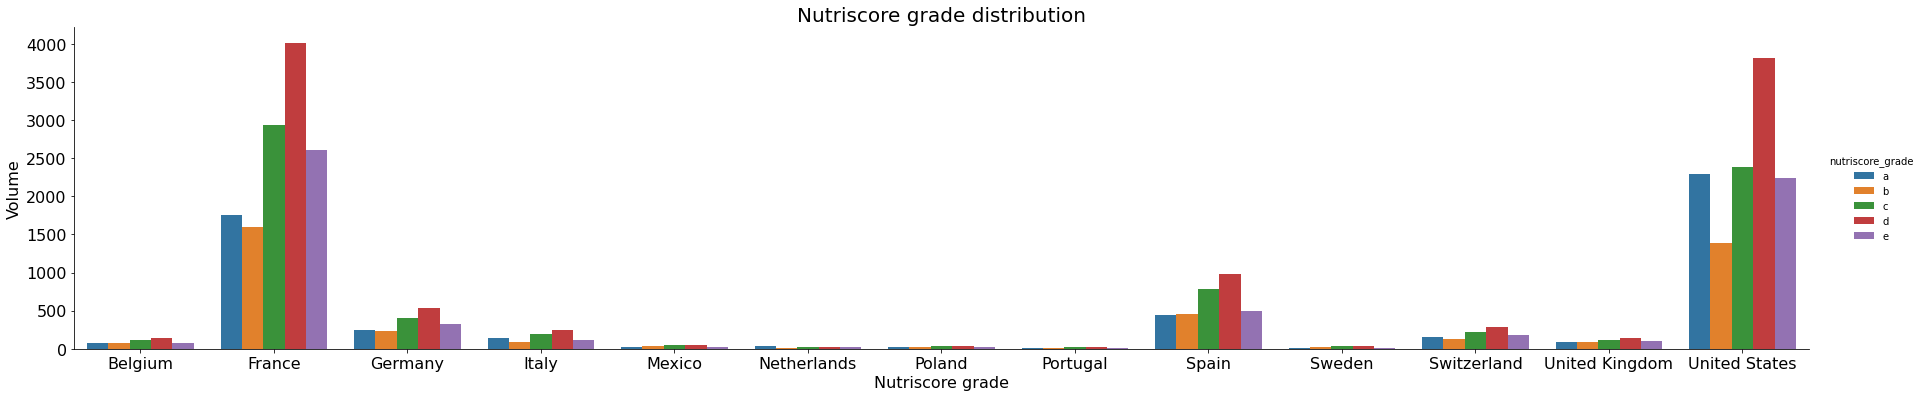

In [29]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="nutriscore_grade", data=nutriscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# 8 Ecoscore / countries distribution

Let's see now how the ecoscore is distributed by country.

In [16]:
data_by_countries_ecoscore = data.groupby(["countries_en", "ecoscore_grade_fr"]).ecoscore_grade_fr.agg([len])
data_by_countries_ecoscore

len
countries_en                     ecoscore_grade_fr      
Albania                          c                     1
                                 d                     1
Algeria                          a                     1
                                 b                     4
                                 c                     8
                                 d                     9
                                 e                     1
Allemagne                        e                     1
Andorra                          b                     1
                                 e                     1
Argentina                        a                     1
                                 b                     6
                                 c                    10
                                 d                    19
                                 e                     3
Australia                        a                     6
                                 b                    31
                                 c                    22
                                 d                    23
                                 e                    11
Austria                          a                     6
                                 b                    14
                                 c                     6
                                 d                     9
                                 e                     9
Belgien                          b                     1
Belgique                         b                     1
Belgium                          a                     9
                                 b                   120
                                 c                    79
                                 d                   151
                                 e                    98
Bolivia                          b                     2
                                 c                     4
                                 d                     3
Brazil                           a                     2
                                 b                     1
                                 c                     2
                                 d                     4
Bulgaria                         a                     1
                                 b                     2
                                 d                     1
                                 e                     2
Burkina Faso                     b                     2
                                 d                     1
Cambodia                         b                     1
                                 d                     1
Canada                           a                     4
                                 b                    35
                                 c                    17
                                 d                    41
                                 e                    28
Chile                            b                     3
                                 c                     3
                                 d                     7
China                            c                     1
                                 d                     1
Colombia                         b                     6
                                 c                    10
                                 d                     8
                                 e                     2
Costa Rica                       c                     1
                                 d                     4
Croatia                          a                     1
Cyprus                           b                     3
                                 c                     1
Czech Republic                   b                     6
                                 c                     4
                                 d                     9
      

In [17]:
data_by_countries_ecoscore = data_by_countries_ecoscore.reset_index()
data_by_countries_ecoscore.head()

,countries_en,ecoscore_grade_fr,len
0,Albania,c,1
1,Albania,d,1
2,Algeria,a,1
3,Algeria,b,4
4,Algeria,c,8


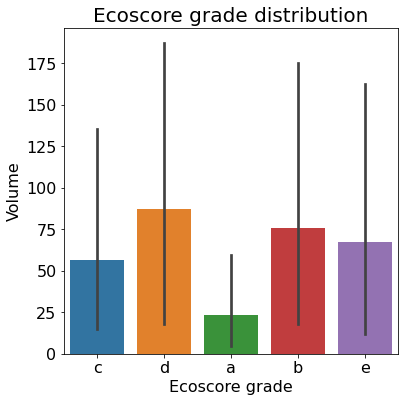

In [18]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_ecoscore["ecoscore_grade_fr"], y=data_by_countries_ecoscore["len"])

plt.title("Ecoscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Ecoscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

In [30]:
ecoscore_distrib_per_country = data_by_countries_ecoscore.loc[data_by_countries_ecoscore.countries_en.isin(["France", "Germany", "Belgium", "Canad", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

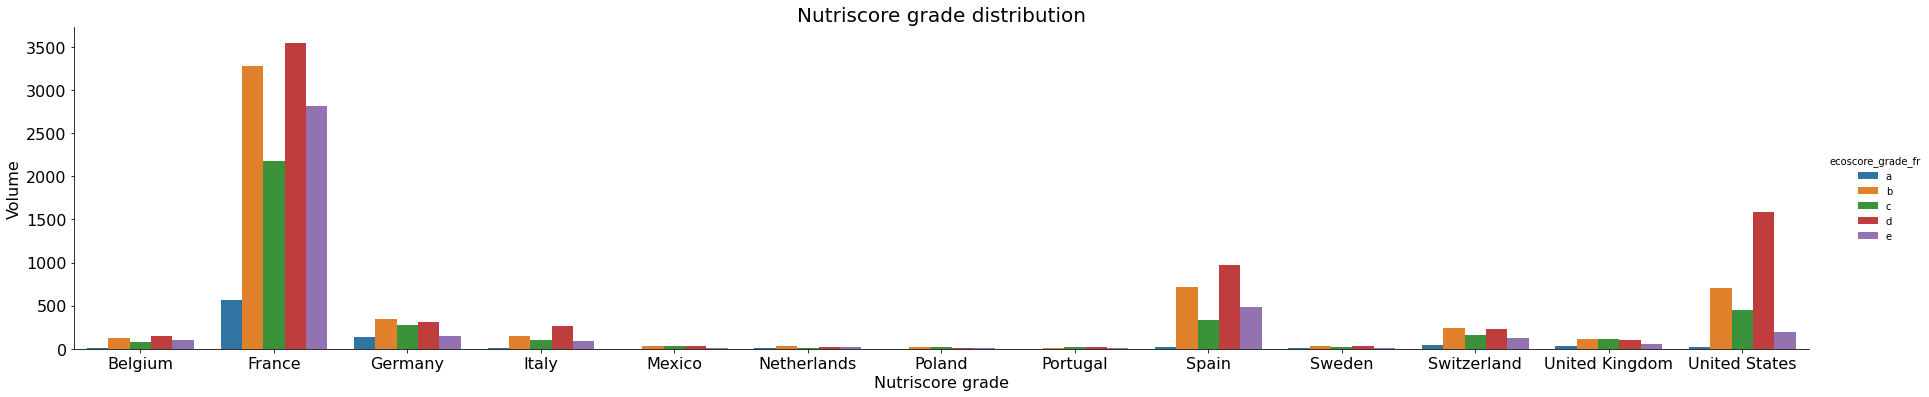

In [35]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="ecoscore_grade_fr", data=ecoscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()